# Example of Use

In [1]:
import pandas as pd

import powerplantmatching as pm

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
ERROR 1: PROJ: proj_create_from_database: Open of /home/fabian/.miniconda3/share/proj failed


Load open source data published by the Global Energy Observatory, [GEO](http://www.globalenergyobservatory.org). As you might know, this is not the original format of the database but the standardized format of powerplantmatching.

In [2]:
geo = pm.data.GEO()

geo.head()

GEO,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
0,Duernrohr Chp,Hard Coal,CCGT,CHP,Austria,373.384467,NaN,1985.0,NaN,NaN,48.3264,15.9246,NaN,NaN,NaN,NaN,NaN,GEO-45151
1,Duernrohr Chp,Hard Coal,CCGT,CHP,Austria,324.521809,NaN,1985.0,NaN,NaN,48.3264,15.9246,NaN,NaN,NaN,NaN,NaN,GEO-45151
2,Mellach Chp,Hard Coal,Steam Turbine,CHP,Austria,226.796491,NaN,1986.0,NaN,NaN,46.9115,15.4884,NaN,NaN,NaN,NaN,NaN,GEO-45150
3,Lenzing,Hard Coal,NaN,PP,Austria,11.063243,NaN,1955.0,NaN,NaN,47.9767,13.6201,NaN,NaN,NaN,NaN,NaN,GEO-45719
4,Lenzing,Hard Coal,NaN,PP,Austria,19.360676,NaN,1972.0,NaN,NaN,47.9767,13.6201,NaN,NaN,NaN,NaN,NaN,GEO-45719


Load the data published by the [ENTSOE](https://transparency.entsoe.eu/generation/r2/installedCapacityPerProductionUnit/show) which has the same format as the GEO data.

In [3]:
entsoe = pm.data.ENTSOE()

entsoe.head()

ENTSOE,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
0,Aanekoski,Bioenergy,NaN,PP,Finland,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44W-T-YT-000017B,44W-T-YT-000017B
1,Abono,Hard Coal,NaN,PP,Spain,561.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18WABO2-12345-0N,18WABO2-12345-0N
2,Abono,Hard Coal,NaN,PP,Spain,341.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18WABO1-12345-0X,18WABO1-12345-0X
3,Abthb,Hard Coal,NaN,PP,United Kingdom,1590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48WSTN0000ABTHBN,48WSTN0000ABTHBN
4,Abthgt,Oil,NaN,PP,United Kingdom,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48WSTN000ABTHGTK,48WSTN000ABTHGTK


## Data Inspection

Whereas various options of inspection are provided by the pandas package, some more powerplant-specific methods are applicable via an accessor 'powerplant'. It gives you a convenient way to inspect, manipulate the data:

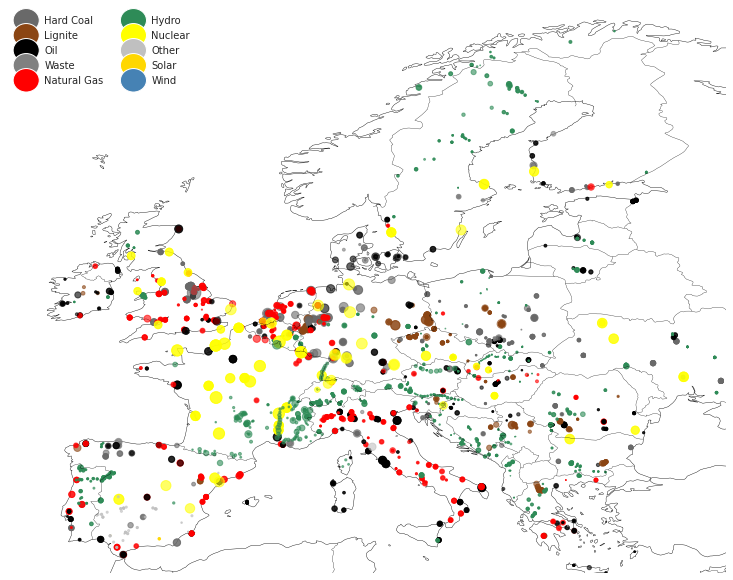

In [4]:
geo.powerplant.plot_map(figsize=(11, 8));

In [5]:
geo.powerplant.lookup().head(20).to_frame()

Capacity
Country                Fueltype             
Albania                Hydro        1458.488
                       Oil            89.855
Austria                Hard Coal     990.160
                       Hydro        7495.837
                       Natural Gas  1112.211
                       Oil          2935.705
                       Wind            0.000
Belgium                Hard Coal    1726.788
                       Hydro        1310.298
                       Natural Gas  3034.023
                       Nuclear      4966.076
                       Oil          1093.076
                       Waste         366.526
                       Wind            0.000
Bosnia and Herzegovina Hard Coal     414.872
                       Hydro        2184.036
                       Lignite      1226.446
Bulgaria               Hard Coal    1742.461
                       Hydro        2457.894
                       Lignite      2747.977

In [6]:
geo.powerplant.fill_missing_commissioning_years().head()

/tmp/ipykernel_227814/846699350.py:1: DeprecatedWarning: fill_missing_commyears is deprecated as of 0.5.0 and will be removed in 0.6.0. This function was renamed to `fill_missing_commissioning_years`
  geo.powerplant.fill_missing_commyears().head()


GEO,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
0,Duernrohr Chp,Hard Coal,CCGT,CHP,Austria,373.384467,NaN,1985,1985.0,NaN,48.3264,15.9246,NaN,NaN,NaN,NaN,NaN,GEO-45151
1,Duernrohr Chp,Hard Coal,CCGT,CHP,Austria,324.521809,NaN,1985,1985.0,NaN,48.3264,15.9246,NaN,NaN,NaN,NaN,NaN,GEO-45151
2,Mellach Chp,Hard Coal,Steam Turbine,CHP,Austria,226.796491,NaN,1986,1986.0,NaN,46.9115,15.4884,NaN,NaN,NaN,NaN,NaN,GEO-45150
3,Lenzing,Hard Coal,NaN,PP,Austria,11.063243,NaN,1955,1955.0,NaN,47.9767,13.6201,NaN,NaN,NaN,NaN,NaN,GEO-45719
4,Lenzing,Hard Coal,NaN,PP,Austria,19.360676,NaN,1972,1972.0,NaN,47.9767,13.6201,NaN,NaN,NaN,NaN,NaN,GEO-45719


Of course the pandas functions are also very convenient:

In [7]:
print(f"Total capacity of GEO is: \n  {geo.Capacity.sum()} MW \n")
print(f"The technology types are: \n {geo.Technology.unique()} ")

Total capacity of GEO is: 
  621580.8665191324 MW 

The technology types are: 
 ['CCGT' 'Steam Turbine' nan 'OCGT' 'Reservoir' 'Run-Of-River'
 'Pumped Storage' 'PV' 'CSP'] 


## Incomplete data

All open databases are so far not complete and cover only a part of overall European powerplants. We perceive the capacity gaps looking at the [ENTSOE SO&AF Statistics](https://docs.entsoe.eu/dataset/scenario-outlook-adequacy-forecast-2012-2030). 

In [8]:
stats = pm.data.Capacity_stats()

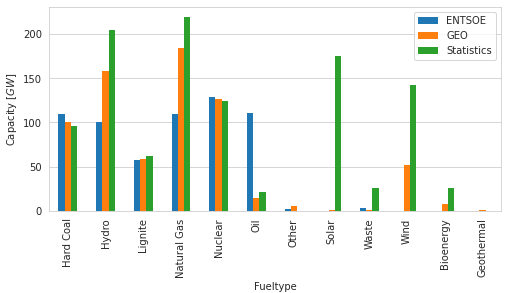

In [9]:
pm.plot.fueltype_totals_bar([geo, entsoe, stats], keys=["ENTSOE", "GEO", "Statistics"]);

The gaps for both datasets are unmistakable. Adding both datasets on top of each other would not be a solution, since the intersections of both sources are two high, and the resulting dataset would include many duplicates. A better approach is to merge the incomplete datasets together, respecting **intersections** and **differences** of each dataset. 

## Merging datasets

Before comparing two lists of power plants, we need to make sure that the data sets are on the same level of aggregation. That is, we ensure that all power plant blocks are aggregated to [power plant stations](https://en.wikipedia.org/wiki/Power_station). 

In [10]:
dfs = [geo.powerplant.aggregate_units(), entsoe.powerplant.aggregate_units()]
intersection = pm.matching.combine_multiple_datasets(dfs)

INFO:powerplantmatching.cleaning:Aggregating blocks in data source 'GEO'.
INFO:powerplantmatching.cleaning:Aggregating blocks in data source 'ENTSOE'.
INFO:powerplantmatching.matching:Comparing data sources `GEO` and `ENTSOE`


In [11]:
intersection.head()

GEO                       Name             Fueltype             \
                           GEO    ENTSOE        GEO     ENTSOE   
0               Fierza Albania   Fierzag      Hydro      Hydro   
1    Dalkia Poznan Karolin Chp   Karolin  Hard Coal  Hard Coal   
2                      Alqueva   Alqueva      Hydro      Hydro   
3              Aguieira Brazil  Aguieira      Hydro      Hydro   
4                       Zydowo    Zydowo      Hydro      Hydro   

GEO      Technology                    Set          Country            ...  \
                GEO          ENTSOE    GEO ENTSOE       GEO    ENTSOE  ...   
0         Reservoir       Reservoir     PP     PP   Albania   Albania  ...   
1               NaN             NaN    CHP     PP    Poland    Poland  ...   
2         Reservoir  Pumped Storage     PP  Store  Portugal  Portugal  ...   
3         Reservoir  Pumped Storage     PP  Store  Portugal  Portugal  ...   
4    Pumped Storage  Pumped Storage  Store  Store    Poland    Poland  ...   

GEO Volume_Mm3        DamHeight_m        StorageCapacity_MWh         \
           GEO ENTSOE         GEO ENTSOE                 GEO ENTSOE   
0          0.0    0.0         0.0    0.0                 0.0    0.0   
1          0.0    0.0         0.0    0.0                 0.0    0.0   
2          0.0    0.0         0.0    0.0                 0.0    0.0   
3          0.0    0.0         0.0    0.0                 0.0    0.0   
4          0.0    0.0         0.0    0.0                 0.0    0.0   

GEO                   EIC                                          projectID  \
                      GEO                                ENTSOE          GEO   
0    {nan, nan, nan, nan}                    {54W-FIERZ000001A}  {GEO-42688}   
1         {nan, nan, nan}  {19W0000000000725, 19W0000000000741}  {GEO-42494}   
2              {nan, nan}                    {16WALQUE-------F}  {GEO-43534}   
3         {nan, nan, nan}                    {16WAGUIE-------3}  {GEO-43566}   
4         {nan, nan, nan}                    {19W0000000002426}  {GEO-42470}   

GEO                                        
                                   ENTSOE  
0                      {54W-FIERZ000001A}  
1    {19W0000000000725, 19W0000000000741}  
2                      {16WALQUE-------F}  
3                      {16WAGUIE-------3}  
4                      {19W0000000002426}  

[5 rows x 36 columns]

The result of the matching process is a multi-indexed dataframe. To bring the matched dataframe into a convenient format, we combine the information of the two sources.

In [12]:
intersection = intersection.powerplant.reduce_matched_dataframe()
intersection.head()

GEO,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
0,Fierzag,Hydro,Reservoir,PP,Albania,500.0,NaN,1978.0,2003.0,NaN,42.251390,20.04306,NaN,0.0,0.0,0.0,{54W-FIERZ000001A},"{'ENTSOE': {'54W-FIERZ000001A'}, 'GEO': {'GEO-..."
1,Karolin,Hard Coal,NaN,CHP,Poland,261.0,NaN,1985.0,NaN,NaN,52.436300,16.98790,NaN,0.0,0.0,0.0,"{19W0000000000725, 19W0000000000741}","{'ENTSOE': {'19W0000000000725', '19W0000000000..."
2,Alqueva,Hydro,Pumped Storage,Store,Portugal,508.0,NaN,2004.0,NaN,NaN,38.197500,-7.49640,NaN,0.0,0.0,0.0,{16WALQUE-------F},"{'ENTSOE': {'16WALQUE-------F'}, 'GEO': {'GEO-..."
3,Aguieira,Hydro,Pumped Storage,Store,Portugal,336.0,NaN,1981.0,NaN,NaN,40.340200,-8.19700,NaN,0.0,0.0,0.0,{16WAGUIE-------3},"{'ENTSOE': {'16WAGUIE-------3'}, 'GEO': {'GEO-..."
4,Zydowo,Hydro,Pumped Storage,Store,Poland,167.0,NaN,1971.0,NaN,NaN,54.024965,16.70690,NaN,0.0,0.0,0.0,{19W0000000002426},"{'ENTSOE': {'19W0000000002426'}, 'GEO': {'GEO-..."


As you can see in the very last column, we can track which original data entries flew into the resulting one.

We can have a look into the Capacity statistics.

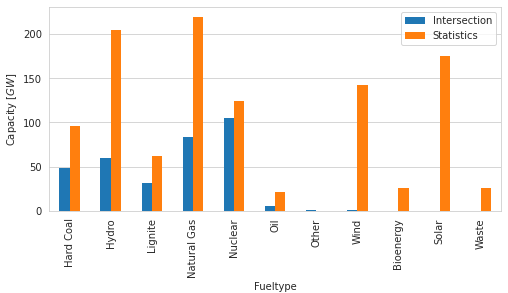

In [13]:
pm.plot.fueltype_totals_bar([intersection, stats], keys=["Intersection", "Statistics"]);

In [14]:
combined = intersection.powerplant.extend_by_non_matched(
    entsoe
).powerplant.extend_by_non_matched(geo)

INFO:powerplantmatching.cleaning:Aggregating blocks in data source 'ENTSOE'.
INFO:powerplantmatching.cleaning:Aggregating blocks in data source 'GEO'.


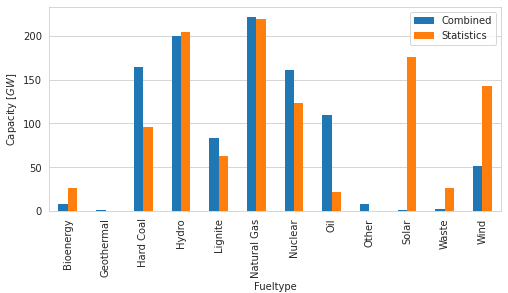

In [15]:
pm.plot.fueltype_totals_bar([combined, stats], keys=["Combined", "Statistics"]);

The aggregated capacities roughly match the SO&AF for all conventional powerplants.

## Processed Data

powerplantmatching comes along with already matched data, this includes data from GEO, ENTSOE, OPSD, CARMA, GPD and ESE (ESE, only if you have followed the [instructions](https://github.com/FRESNA/powerplantmatching)).

In [16]:
m = pm.collection.powerplants()

/tmp/ipykernel_227814/3660418824.py:1: DeprecatedWarning: matched_data is deprecated as of 5.5 and will be removed in 0.6. Use `powerplants` instead.
  m = pm.collection.matched_data()


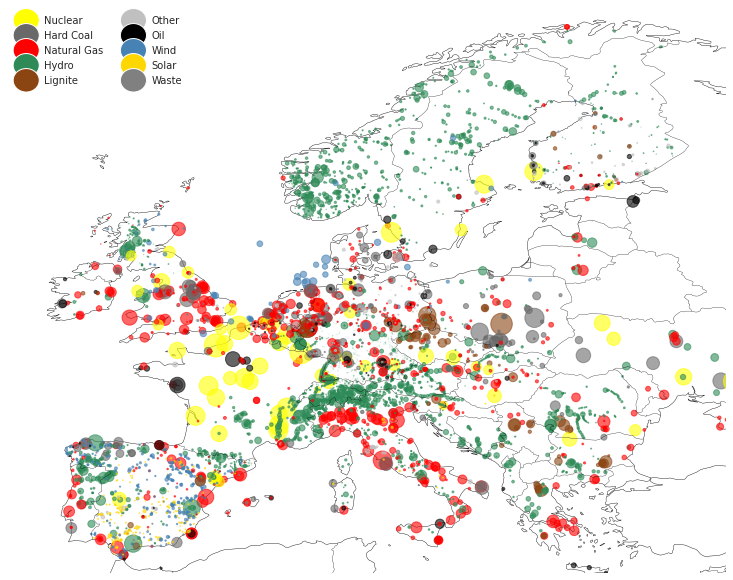

In [17]:
m.powerplant.plot_map(figsize=(11, 8));

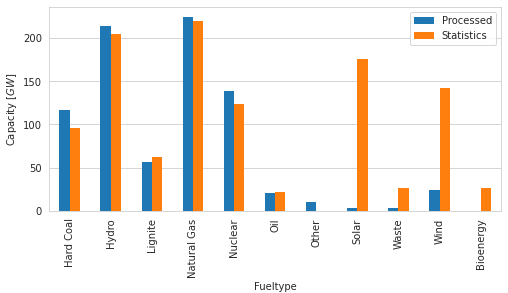

In [18]:
pm.plot.fueltype_totals_bar([m, stats], keys=["Processed", "Statistics"]);

/home/fabian/vres/py/powerplantmatching/powerplantmatching/plot.py:230: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare.append(


(<Figure size 864x648 with 1 Axes>, <AxesSubplot:ylabel='Capacity [GW]'>)

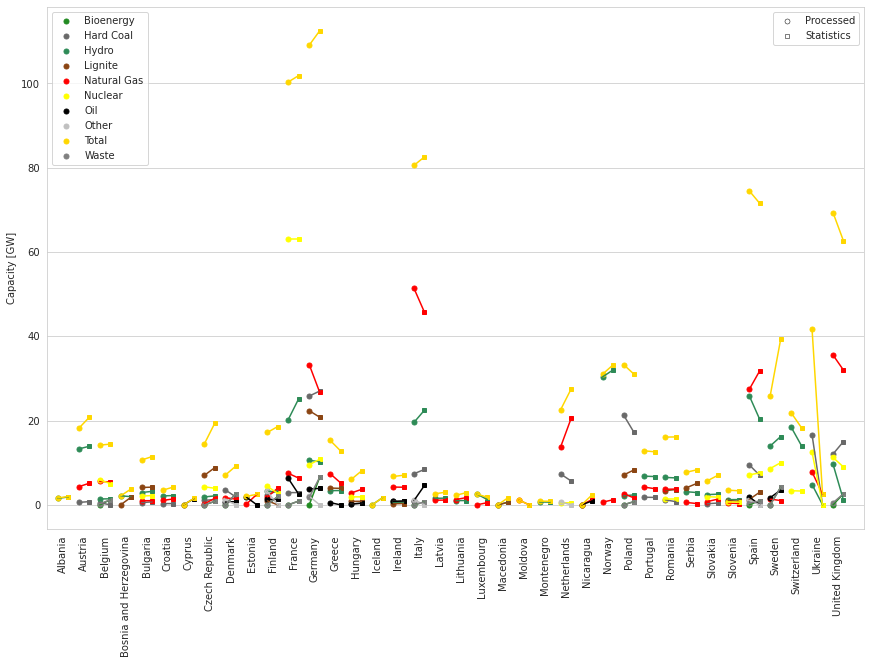

In [19]:
pm.plot.factor_comparison([m, stats], keys=["Processed", "Statistics"])

In [20]:
m.head()

Matched Data,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
id,,,,,,,,,,,,,,,,,,
0,Emsland,Nuclear,Steam Turbine,CHP,Germany,1336.000000,0.33,1988.0,1988.0,2022.0,52.481878,7.306658,NaN,0.0,0.0,0.0,{'11WD7KKE-1K--KW5'},"{'ENTSOE': {'11WD7KKE-1K--KW5'}, 'OPSD': {'BNA..."
1,Mellach,Hard Coal,Steam Turbine,CHP,Austria,200.000000,NaN,1986.0,1986.0,2020.0,46.911700,15.488300,NaN,0.0,0.0,0.0,{'14W-WML-KW-----0'},"{'BEYONDCOAL': {'BEYOND-AT-11'}, 'ENTSOE': {'1..."
2,Eemshaven,Hard Coal,CCGT,PP,Netherlands,1604.170304,0.58,2015.0,NaN,2029.0,53.440500,6.861200,NaN,0.0,0.0,0.0,{'49W000000000044-'},"{'BEYONDCOAL': {'BEYOND-NL-12'}, 'ENTSOE': {'4..."
3,Emile Huchet,Hard Coal,CCGT,PP,France,596.493211,NaN,1958.0,2010.0,2022.0,49.152500,6.698100,NaN,0.0,0.0,0.0,"{'17W100P100P0345B', '17W100P100P0344D'}","{'BEYONDCOAL': {'BEYOND-FR-67'}, 'ENTSOE': {'1..."
4,Fusina,Hard Coal,Steam Turbine,PP,Italy,899.810470,NaN,1964.0,NaN,2025.0,45.431400,12.245800,NaN,0.0,0.0,0.0,{'26WIMPI-S05FTSNK'},"{'BEYONDCOAL': {'BEYOND-IT-24'}, 'ENTSOE': {'2..."


In [21]:
pd.concat(
    [
        m[m.DateIn.notnull()].groupby("Fueltype").DateIn.count(),
        m[m.DateIn.isna()].fillna(1).groupby("Fueltype").DateIn.count(),
    ],
    keys=["DateIn existent", "DateIn missing"],
    axis=1,
)

,DateIn existent,DateIn missing
Fueltype,,
Hard Coal,191,10.0
Hydro,1743,1549.0
Lignite,98,9.0
Natural Gas,727,54.0
Nuclear,63,NaN
Oil,62,33.0
Other,103,75.0
Solar,12,191.0
Waste,84,17.0
